<a href="https://colab.research.google.com/github/ahmadmasood43/Glioblastoma-Detection-and-VR-Conversion/blob/main/classification_of_glioblastoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

<ipython-input-31-4addd0ae159c>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
os.chdir('/content/gdrive/MyDrive/brain_tumor_dataset/no')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/gdrive/MyDrive/brain_tumor_dataset/yes')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,99):
    y.append('N')
print(y)

  0%|          | 0/308 [00:00<?, ?it/s]

1
1
1
1


  8%|▊         | 25/308 [00:00<00:03, 76.73it/s]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


 22%|██▏       | 68/308 [00:00<00:01, 147.12it/s]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


 36%|███▌      | 111/308 [00:00<00:01, 180.38it/s]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


 49%|████▉     | 151/308 [00:01<00:00, 180.03it/s]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


 66%|██████▌   | 204/308 [00:01<00:00, 218.46it/s]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
C
C
C
C
C
C
C
C


 74%|███████▎  | 227/308 [00:01<00:00, 122.93it/s]

C
C
C
C
C
C
9
1
6
5
7
8
5
4
4
4
4
4
4


 80%|███████▉  | 245/308 [00:01<00:00, 124.77it/s]

4
4
4
4
n
n
n
n
n
n


 85%|████████▌ | 262/308 [00:02<00:00, 83.79it/s] 

n
n
n
n
n
n
n
n
n
N


 89%|████████▉ | 275/308 [00:02<00:00, 80.23it/s]

N
N
N
N
n
C
C
C
N
C
C
N
N
N
N


 94%|█████████▎| 288/308 [00:02<00:00, 86.74it/s]

N
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
N
N

100%|██████████| 308/308 [00:02<00:00, 115.83it/s]



N
n
n
n
n
n
N
N
N


100%|██████████| 506/506 [00:05<00:00, 95.17it/s] 

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '4', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '2',

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model

In [12]:

import os
from lxml import etree

# Folder path
folder_path = '/content/gdrive/MyDrive/brain_tumor_dataset/annotations'  # Replace with the path to your folder

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Check if the file is not already in XML format
    if not filename.endswith('.xml'):
        # Convert the file to XML format
        xml_filename = os.path.splitext(filename)[0] + '.xml'
        xml_filepath = os.path.join(folder_path, xml_filename)

        # Delete the previous version of the XML file if it exists
        if os.path.exists(xml_filepath):
            os.remove(xml_filepath)

        # Rename the file to the XML format
        os.rename(file_path, xml_filepath)

        # Update the file path
        file_path = xml_filepath

    # Remove double extensions from the file name
    base_filename = os.path.splitext(filename)[0]
    new_filename = os.path.splitext(base_filename)[0] + os.path.splitext(filename)[1]
    new_file_path = os.path.join(folder_path, new_filename)
    os.rename(file_path, new_file_path)

    # Update the file path
    file_path = new_file_path

    # Load the XML file
    try:
        tree = etree.parse(file_path)
        root = tree.getroot()

        # Modify the XML content as needed

        # Save the updated XML file
        tree.write(file_path, pretty_print=True)

        print(f"Processed: {filename}")
    except etree.XMLSyntaxError:
        print(f"Error processing: {filename}")

print("File format conversion and double extension removal complete.")



Error processing: 3 yes.xml.xml
Error processing: 6 yes.xml.xml
Error processing: 7 yes.xml.xml
Error processing: 4 yes.xml.xml
Error processing: 5 yes.xml.xml
Error processing: 2 yes.xml.xml
Error processing: 8 yes.xml.xml
Error processing: 11 yes.xml.xml
Error processing: 12 yes.xml.xml
Error processing: 13 yes.xml.xml
Error processing: 14 yes.xml.xml
Error processing: 17 yes.xml.xml
Error processing: 10 yes.xml.xml
Error processing: 15 yes.xml.xml
Error processing: 18 yes.xml.xml
Error processing: 16 yes.xml.xml
Error processing: 9 yes.xml.xml
Error processing: 53 yes.xml.xml
Error processing: 49 yes.xml.xml
Error processing: 30 yes.xml.xml
Error processing: 33 yes.xml.xml
Error processing: 38 yes.xml.xml
Error processing: 35 yes.xml.xml
Error processing: 37 yes.xml.xml
Error processing: 36 yes.xml.xml
Error processing: 34 yes.xml.xml
Error processing: 31 yes.xml.xml
Error processing: 47 yes.xml.xml
Error processing: 43 yes.xml.xml
Error processing: 48 yes.xml.xml
Error processing: 

In [15]:
import os

# Folder path
folder_path = '/content/gdrive/MyDrive/brain_tumor_dataset/annotations'  # Replace with the path to your folder


# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Remove double extensions from the file name
    base_filename, extension = os.path.splitext(filename)
    while '.' in base_filename:
        base_filename, extension = os.path.splitext(base_filename)

    # Rename the file if the name has changed
    if base_filename != os.path.splitext(os.path.basename(file_path))[0]:
        new_file_path = os.path.join(folder_path, base_filename + extension)
        os.rename(file_path, new_file_path)
        print(f"Renamed: {base_filename + extension}")

print("Double extension removal complete.")

Renamed: 3 yes.xml
Renamed: 6 yes.xml
Renamed: 7 yes.xml
Renamed: 4 yes.xml
Renamed: 5 yes.xml
Renamed: 2 yes.xml
Renamed: 8 yes.xml
Renamed: 11 yes.xml
Renamed: 12 yes.xml
Renamed: 13 yes.xml
Renamed: 14 yes.xml
Renamed: 17 yes.xml
Renamed: 10 yes.xml
Renamed: 15 yes.xml
Renamed: 18 yes.xml
Renamed: 16 yes.xml
Renamed: 9 yes.xml
Renamed: 53 yes.xml
Renamed: 49 yes.xml
Renamed: 30 yes.xml
Renamed: 33 yes.xml
Renamed: 38 yes.xml
Renamed: 35 yes.xml
Renamed: 37 yes.xml
Renamed: 36 yes.xml
Renamed: 34 yes.xml
Renamed: 31 yes.xml
Renamed: 47 yes.xml
Renamed: 43 yes.xml
Renamed: 48 yes.xml
Renamed: 40 yes.xml
Renamed: 42 yes.xml
Renamed: 44 yes.xml
Renamed: 46 yes.xml
Renamed: 45 yes.xml
Renamed: 41 yes.xml
Renamed: 21 yes.xml
Renamed: 28 yes.xml
Renamed: 26 yes.xml
Renamed: 24 yes.xml
Renamed: 25 yes.xml
Renamed: 22 yes.xml
Renamed: 23 yes.xml
Renamed: 20 yes.xml
Renamed: 27 yes.xml
Renamed: 39 yes.xml
Renamed: 32 yes.xml
Renamed: 29 yes.xml
Renamed: 19 yes.xml
Renamed: 93 yes.xml
Renamed:

In [21]:
import os
import xml.etree.ElementTree as ET

# Folder path
folder_path = '/content/gdrive/MyDrive/brain_tumor_dataset/annotations'  # Replace with the path to your folder

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    if filename.endswith('.xml'):
        try:
            # Parse the XML file
            tree = ET.parse(file_path)
            
            # Correct any issues with the XML structure
            fixed_xml = ET.tostring(tree.getroot(), encoding='unicode')

            # Write the corrected XML back to the file
            with open(file_path, 'w') as file:
                file.write(fixed_xml)

            print(f"Fixed XML syntax: {filename}")
        
        except ET.ParseError as e:
            print(f"Error parsing file: {filename} - {e}")

print("XML syntax correction complete.")


Error parsing file: 3 yes.xml - no element found: line 2, column 0
Error parsing file: 6 yes.xml - no element found: line 2, column 0
Error parsing file: 7 yes.xml - no element found: line 2, column 0
Error parsing file: 4 yes.xml - no element found: line 2, column 0
Error parsing file: 5 yes.xml - no element found: line 2, column 0
Error parsing file: 2 yes.xml - no element found: line 2, column 0
Error parsing file: 8 yes.xml - no element found: line 2, column 0
Error parsing file: 11 yes.xml - no element found: line 2, column 0
Error parsing file: 12 yes.xml - no element found: line 2, column 0
Error parsing file: 13 yes.xml - no element found: line 2, column 0
Error parsing file: 14 yes.xml - no element found: line 2, column 0
Error parsing file: 17 yes.xml - no element found: line 2, column 0
Error parsing file: 10 yes.xml - no element found: line 2, column 0
Error parsing file: 15 yes.xml - no element found: line 2, column 0
Error parsing file: 18 yes.xml - no element found: line

In [25]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG16

# Define the input folders containing the images
tumor_input_folder = '/content/gdrive/MyDrive/brain_tumor_dataset/yes'
non_tumor_input_folder = '/content/gdrive/MyDrive/brain_tumor_dataset/no'

# Define the output folders to save the modified images
tumor_output_folder = '/content/gdrive/MyDrive/brain_tumor_dataset_modified/yes'
non_tumor_output_folder = '/content/gdrive/MyDrive/brain_tumor_dataset_modified/no'

# Define the desired image size
target_size = (224, 224)  # Specify the width and height in pixels

# Define the contrast enhancement parameters
alpha = 1.5  # Contrast control (1.0 - no change)
beta = 10  # Brightness control (0-100)

# Initialize empty lists to store images and labels
images = []
labels = []

# Iterate over tumor images
for filename in os.listdir(tumor_input_folder):
    if filename.endswith('.jpg'):
        # Read the image
        image_path = os.path.join(tumor_input_folder, filename)
        image = cv2.imread(image_path)

        # Resize the image
        resized_image = cv2.resize(image, target_size)

        # Enhance contrast and brightness
        modified_image = cv2.convertScaleAbs(resized_image, alpha=alpha, beta=beta)

        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(modified_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, binary_image = cv2.threshold(grayscale_image, 127, 255, cv2.THRESH_BINARY)

        # Add channel dimension to the image
        binary_image = np.expand_dims(binary_image, axis=-1)

        # Append the modified image to the list of images
        images.append(binary_image)

        # Append the label (tumor) to the list of labels
        labels.append(1)

        # Generate the output file path with PNG extension
        output_filename = os.path.splitext(filename)[0] + '.png'
        output_path = os.path.join(tumor_output_folder, output_filename)

        # Save the modified image as PNG
        cv2.imwrite(output_path, binary_image)

        print(f"Tumor image modified and saved: {output_path}")

# Iterate over non-tumor images
for filename in os.listdir(non_tumor_input_folder):
    if filename.endswith('.jpg'):
        # Read the image
        image_path = os.path.join(non_tumor_input_folder, filename)
        image = cv2.imread(image_path)

        # Resize the image
        resized_image = cv2.resize(image, target_size)

        # Enhance contrast and brightness
        modified_image = cv2.convertScaleAbs(resized_image, alpha=alpha, beta=beta)

        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(modified_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, binary_image = cv2.threshold(grayscale_image, 127, 255, cv2.THRESH_BINARY)

        # Add channel dimension to the image
        binary_image = np.expand_dims(binary_image, axis=-1)

        # Append the modified image to the list of images
        images.append(binary_image)

        # Append the label (non-tumor) to the list of labels
        labels.append(0)

        # Generate the output file path with PNG extension
        output_filename = os.path.splitext(filename)[0] + '.png'
        output_path = os.path.join(non_tumor_output_folder, output_filename)

        # Save the modified image as PNG
        cv2.imwrite(output_path, binary_image)

        print(f"Non-tumor image modified and saved: {output_path}")



Tumor image modified and saved: /content/gdrive/MyDrive/brain_tumor_dataset_modified/yes/247 yes.png
Tumor image modified and saved: /content/gdrive/MyDrive/brain_tumor_dataset_modified/yes/250 yes.png
Tumor image modified and saved: /content/gdrive/MyDrive/brain_tumor_dataset_modified/yes/246 yes.png
Tumor image modified and saved: /content/gdrive/MyDrive/brain_tumor_dataset_modified/yes/245 yes.png
Tumor image modified and saved: /content/gdrive/MyDrive/brain_tumor_dataset_modified/yes/248 yes.png
Tumor image modified and saved: /content/gdrive/MyDrive/brain_tumor_dataset_modified/yes/249 yes.png
Tumor image modified and saved: /content/gdrive/MyDrive/brain_tumor_dataset_modified/yes/244 yes.png
Tumor image modified and saved: /content/gdrive/MyDrive/brain_tumor_dataset_modified/yes/243 yes.png
Tumor image modified and saved: /content/gdrive/MyDrive/brain_tumor_dataset_modified/yes/242 yes.png
Tumor image modified and saved: /content/gdrive/MyDrive/brain_tumor_dataset_modified/yes/24

to remove file name part

In [39]:
import os

# Specify the folder path
folder_path = '/content/gdrive/MyDrive/brain_tumor_dataset/annotations'

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    # Split the filename and extension
    name, extension = os.path.splitext(filename)

    # Remove the desired part of the filename
    new_name = name.replace('.xml', '')

    # Construct the full file paths
    current_path = os.path.join(folder_path, filename)
    new_path = os.path.join(folder_path, new_name + extension)

    # Rename the file
    os.rename(current_path, new_path)


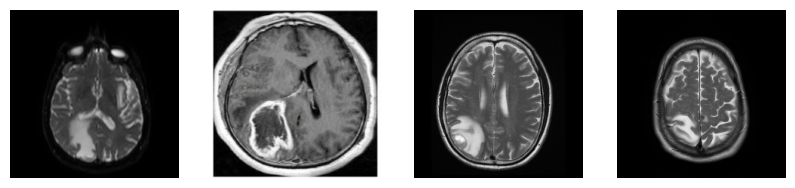

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [40]:
tumor_folder = '/content/gdrive/MyDrive/brain_tumor_dataset/yes'  # Folder with tumor images
non_tumor_folder = '/content/gdrive/MyDrive/brain_tumor_dataset/no'  # Folder without tumor images
annotation_folder = '/content/gdrive/MyDrive/brain_tumor_dataset/annotations'  # Folder with tumor annotations


In [55]:
# Define the desired image size
target_size = (224, 224)  # Specify the width and height in pixels

# Initialize empty lists to store images, labels, and annotations
images = []
labels = []
annotations = []

# Iterate over tumor images and corresponding annotations
for filename in os.listdir(tumor_folder):
    if filename.endswith('.jpg'):
        # Read the image
        image_path = os.path.join(tumor_folder, filename)
        image = cv2.imread(image_path)

        # Resize the image
        resized_image = cv2.resize(image, target_size)

        # Append the resized image to the list of images
        images.append(resized_image)

        # Append the label (tumor) to the list of labels
        labels.append(1)

        # Load the corresponding annotation
        annotation_filename = os.path.splitext(filename)[0] + '.txt'
        annotation_path = os.path.join(annotation_folder, annotation_filename)
        with open(annotation_path, 'r') as file:
            annotation = file.read()
            annotations.append(annotation)

        print(f"Tumor image and annotation loaded: {filename}")

# Iterate over non-tumor images
for filename in os.listdir(non_tumor_folder):
    if filename.endswith('.jpg'):
        # Read the image
        image_path = os.path.join(non_tumor_folder, filename)
        image = cv2.imread(image_path)

        # Resize the image
        resized_image = cv2.resize(image, target_size)

        # Append the resized image to the list of images
        images.append(resized_image)

        # Append the label (non-tumor) to the list of labels
        labels.append(0)

        # Append a placeholder annotation for the non-tumor image
        annotations.append('No tumor')

        print(f"Non-tumor image loaded: {filename}")

# Convert the lists of images, labels, and annotations to arrays
X = np.array(images)
y = np.array(labels)
annotations = np.array(annotations)

Tumor image and annotation loaded: 247 yes.jpg
Tumor image and annotation loaded: 250 yes.jpg
Tumor image and annotation loaded: 246 yes.jpg
Tumor image and annotation loaded: 245 yes.jpg
Tumor image and annotation loaded: 248 yes.jpg
Tumor image and annotation loaded: 249 yes.jpg
Tumor image and annotation loaded: 244 yes.jpg
Tumor image and annotation loaded: 243 yes.jpg
Tumor image and annotation loaded: 242 yes.jpg
Tumor image and annotation loaded: 241 yes.jpg
Tumor image and annotation loaded: 5 yes.jpg
Tumor image and annotation loaded: 2 yes.jpg
Tumor image and annotation loaded: 3 yes.jpg
Tumor image and annotation loaded: 1 yes.jpg
Tumor image and annotation loaded: 257 yes.jpg
Tumor image and annotation loaded: 256 yes.jpg
Tumor image and annotation loaded: 255 yes.jpg
Tumor image and annotation loaded: 254 yes.jpg
Tumor image and annotation loaded: 252 yes.jpg
Tumor image and annotation loaded: 253 yes.jpg
Tumor image and annotation loaded: 251 yes.jpg
Tumor image and annot

In [82]:
X_train, X_test, y_train, y_test, annotations_train, annotations_test = train_test_split(X, y, annotations, test_size=0.2, random_state=42)

print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [87]:
import numpy as np

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)


In [84]:
datagen = ImageDataGenerator(
    rotation_range=10,  # Random rotation up to 10 degrees
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    zoom_range=0.1,  # Random zoom
    horizontal_flip=True  # Random horizontal flip
)


In [88]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 

In [74]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (260, 224, 224, 3)
X_test Shape:  (65, 224, 224, 3)
y_train Shape:  (260, 2)
y_test Shape:  (65, 2)


In [75]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224 


vgg = vgg16.VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

for layer in vgg.layers[:14]:
    layer.trainable = False
for layer in vgg.layers[15:17]:
    layer.trainable = False    
# Let's print our layers 
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D True
15 Conv2D False
16 Conv2D False
17 Conv2D True
18 MaxPooling2D True


In [76]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model 

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [78]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
# Convert annotations to target labels (1 for tumor, 0 for non-tumor)
target_labels_train = np.array([1 if annotation else 0 for annotation in annotations_train])
target_labels_test = np.array([1 if annotation else 0 for annotation in annotations_test])

# Train the model with augmented data
history = model.fit(datagen.flow(X_train, target_labels_train, batch_size=32),
                    epochs=10,
                    validation_data=(X_test, target_labels_test))

Epoch 1/10


ValueError: ignored

In [89]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input

# Specify the folder path containing test images
test_folder = '/content/gdrive/MyDrive/brain_png_test_data'

# Iterate over each image in the test folder
for filename in os.listdir(test_folder):
    if filename.endswith('.jpg'):
        # Read the image
        image_path = os.path.join(test_folder, filename)
        image = cv2.imread(image_path)

        # Preprocess the image for VGG16 model
        preprocessed_image = cv2.resize(image, (224, 224))
        preprocessed_image = preprocess_input(preprocessed_image)

        # Expand dimensions to match the input shape of the model
        preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

        # Make predictions
        prediction = model.predict(preprocessed_image)
        if prediction[0][0] > 0.5:
            result = 'Tumor detected'
        else:
            result = 'No tumor'

        print(f"Image: {filename} | Result: {result}")


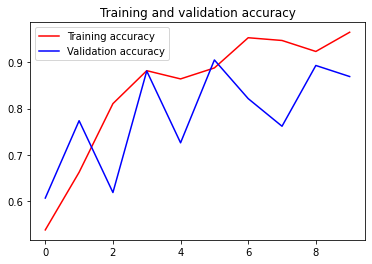

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()